In [1]:
# Imports 
import os
import sys
from io import StringIO
sys.path.append("..")
os.environ["pyna_language"] = 'julia'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Inputs
x_lst = np.linspace(-5000, 15000, 11)
y_lst = np.hstack((np.linspace(0, 3000, 6)[:-1], np.linspace(3000, 6000, 6)))

In [3]:
# Initialize pyna
py = pyna()

# Set config
py.ac_name = 'stca'
py.trajectory_file_name = 'Trajectory_to.csv'
py.engine_file_name = 'Engine_to.csv'
py.lateral_attenuation = True
py.shielding = False
py.all_sources = True
py.levels_int_metric = 'epnl'
py.observer_lst = ('contours',)

py.compute_noise_contours(x_lst=x_lst, y_lst=y_lst)

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/nasa_stca_standard/dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.


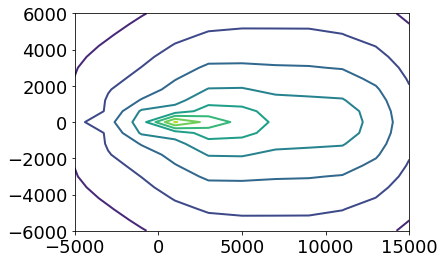

In [4]:
# Plot contour levels
plt.figure()
plt.style.use('../utils/plot.mplstyle')
plt.contour(py.contours['x_lst'], py.contours['y_lst'], py.contours['epnl'])

In [5]:
# Compute contour area for level (epnl= 80 dB)
py.compute_noise_contour_area(py.contours['x_lst'], py.contours['y_lst'], py.contours['epnl'], 80)

36904021.780714974

<Figure size 1200x500 with 0 Axes>